In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['flowers']


In [48]:


script_dir = os.path.dirname(".")
training_set_path = os.path.join(script_dir, '../input/flowers/flowers/')
test_set_path = os.path.join(script_dir, '../input/flowers/flowers/')



In [49]:
from PIL import  Image
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from PIL import Image
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.contrib.keras.api.keras.callbacks import Callback
from tensorflow.contrib.keras.api.keras.preprocessing.image import ImageDataGenerator
from tensorflow.contrib.keras import backend
from keras.optimizers import Adam
print(os.listdir("../input/flowers/flowers/"))

['sunflower', 'tulip', 'daisy', 'rose', 'dandelion']


In [91]:
c = Sequential()

In [92]:
input_size = (256, 256)
c.add(Conv2D(32,(3,3), input_shape=(256,256,3), activation='relu'))
c.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
c.add(Conv2D(32, (3, 3), activation='relu'))
c.add(MaxPooling2D(pool_size=(2, 2)))

c.add(Conv2D(64, (3, 3), activation='relu'))
c.add(MaxPooling2D(pool_size=(2, 2)))

c.add(Conv2D(64, (3, 3), activation='relu'))
c.add(MaxPooling2D(pool_size=(2, 2)))

c.add(Conv2D(128, (3, 3), activation='relu'))
c.add(MaxPooling2D(pool_size=(2, 2)))

c.add(Conv2D(192, (3, 3), activation='relu'))
c.add(MaxPooling2D(pool_size=(2, 2)))

c.add(Flatten())

In [94]:
c.add(Dense(units=32, activation='relu'))
c.add(Dense(units=32, activation='relu'))
c.add(Dense(units=64, activation='relu'))
c.add(Dense(units=128, activation='relu'))
c.add(Dense(units=128, activation='relu'))
c.add(Dropout(0.5))
c.add(Dense(units=5, activation='softmax'))

In [95]:
opt = Adam(lr=1e-3, decay=1e-6)
c.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [96]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.33)

training_set = train_datagen.flow_from_directory(training_set_path,
                                                 target_size=input_size,
                                                 batch_size=batch_size,
                                                 subset="training",
                                                 class_mode='categorical')



test_set = test_datagen.flow_from_directory(test_set_path,
                                            target_size=input_size,
                                            batch_size=batch_size,
                                            subset="validation",
                                            class_mode='categorical')

Found 4323 images belonging to 5 classes.
Found 1424 images belonging to 5 classes.


In [98]:
model_info = c.fit_generator(training_set,
                         steps_per_epoch=1000/batch_size,
                         epochs=150,
                         validation_data=test_set,
                         validation_steps=100/batch_size,
                         workers=12)


Epoch 1/150
32/31 [==============================] - 18s 550ms/step - loss: 0.6322 - acc: 0.7666 - val_loss: 0.5807 - val_acc: 0.7656
Epoch 2/150
32/31 [==============================] - 15s 458ms/step - loss: 0.6179 - acc: 0.7787 - val_loss: 0.4851 - val_acc: 0.7812
Epoch 3/150
32/31 [==============================] - 14s 441ms/step - loss: 0.5533 - acc: 0.8027 - val_loss: 0.5241 - val_acc: 0.7734
Epoch 4/150
32/31 [==============================] - 15s 464ms/step - loss: 0.6262 - acc: 0.7695 - val_loss: 0.4753 - val_acc: 0.8359
Epoch 5/150
32/31 [==============================] - 15s 457ms/step - loss: 0.6477 - acc: 0.7646 - val_loss: 0.4600 - val_acc: 0.8438
Epoch 6/150
32/31 [==============================] - 14s 422ms/step - loss: 0.5857 - acc: 0.7840 - val_loss: 0.4806 - val_acc: 0.8203
Epoch 7/150
32/31 [==============================] - 15s 458ms/step - loss: 0.6182 - acc: 0.7705 - val_loss: 0.4362 - val_acc: 0.8516
Epoch 8/150
32/31 [==============================] - 16s 491ms

Epoch 62/150
32/31 [==============================] - 14s 431ms/step - loss: 0.3694 - acc: 0.8677 - val_loss: 0.2604 - val_acc: 0.8906
Epoch 63/150
32/31 [==============================] - 15s 457ms/step - loss: 0.4094 - acc: 0.8555 - val_loss: 0.2930 - val_acc: 0.9141
Epoch 64/150
32/31 [==============================] - 15s 456ms/step - loss: 0.3553 - acc: 0.8730 - val_loss: 0.2177 - val_acc: 0.9375
Epoch 65/150
32/31 [==============================] - 15s 457ms/step - loss: 0.3692 - acc: 0.8701 - val_loss: 0.2329 - val_acc: 0.9297
Epoch 66/150
32/31 [==============================] - 13s 419ms/step - loss: 0.4116 - acc: 0.8530 - val_loss: 0.4785 - val_acc: 0.8125
Epoch 67/150
32/31 [==============================] - 15s 473ms/step - loss: 0.3822 - acc: 0.8730 - val_loss: 0.1942 - val_acc: 0.9375
Epoch 68/150
32/31 [==============================] - 15s 465ms/step - loss: 0.4062 - acc: 0.8652 - val_loss: 0.5238 - val_acc: 0.8438
Epoch 69/150
32/31 [==============================] - 1

32/31 [==============================] - 14s 441ms/step - loss: 0.2746 - acc: 0.9160 - val_loss: 0.2036 - val_acc: 0.9141
Epoch 123/150
32/31 [==============================] - 15s 455ms/step - loss: 0.2748 - acc: 0.8984 - val_loss: 0.1841 - val_acc: 0.9554
Epoch 124/150
32/31 [==============================] - 15s 471ms/step - loss: 0.2446 - acc: 0.9199 - val_loss: 0.1272 - val_acc: 0.9531
Epoch 125/150
32/31 [==============================] - 14s 440ms/step - loss: 0.2746 - acc: 0.8964 - val_loss: 0.2257 - val_acc: 0.9297
Epoch 126/150
32/31 [==============================] - 15s 456ms/step - loss: 0.3038 - acc: 0.9053 - val_loss: 0.1336 - val_acc: 0.9531
Epoch 127/150
32/31 [==============================] - 15s 467ms/step - loss: 0.2573 - acc: 0.9150 - val_loss: 0.1371 - val_acc: 0.9531
Epoch 128/150
32/31 [==============================] - 14s 437ms/step - loss: 0.2393 - acc: 0.9170 - val_loss: 0.1812 - val_acc: 0.9453
Epoch 129/150
32/31 [==============================] - 15s 456

In [99]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()


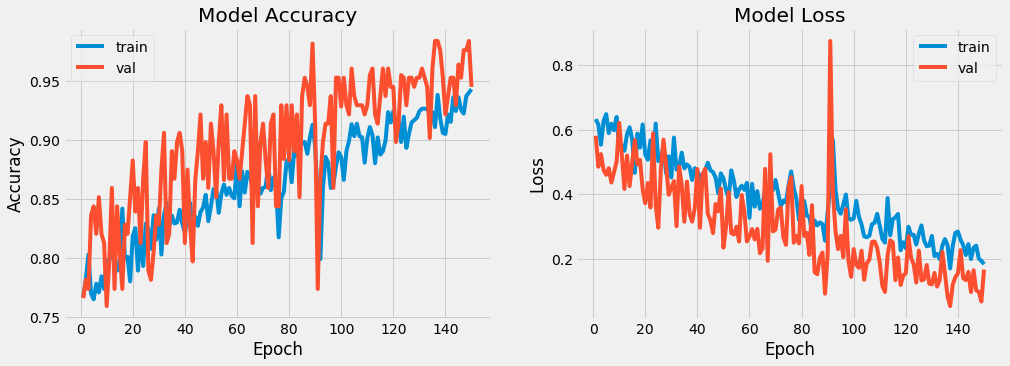

In [100]:
plot_model_history(model_info)
